<a href="https://colab.research.google.com/github/WorKenX306/Model-Weevio/blob/main/Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


In [26]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.scv")

In [27]:
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [28]:

df['date'] = pd.to_datetime(df['date'])
df['SaleYear'] = df['date'].dt.year
sales_per_year_df = df.groupby('SaleYear').size().reset_index(name='Number_of_Sales')
sales_per_year_df

,SaleYear,Number_of_Sales
0,2013,182500
1,2014,182500
2,2015,182500
3,2016,183000
4,2017,182500


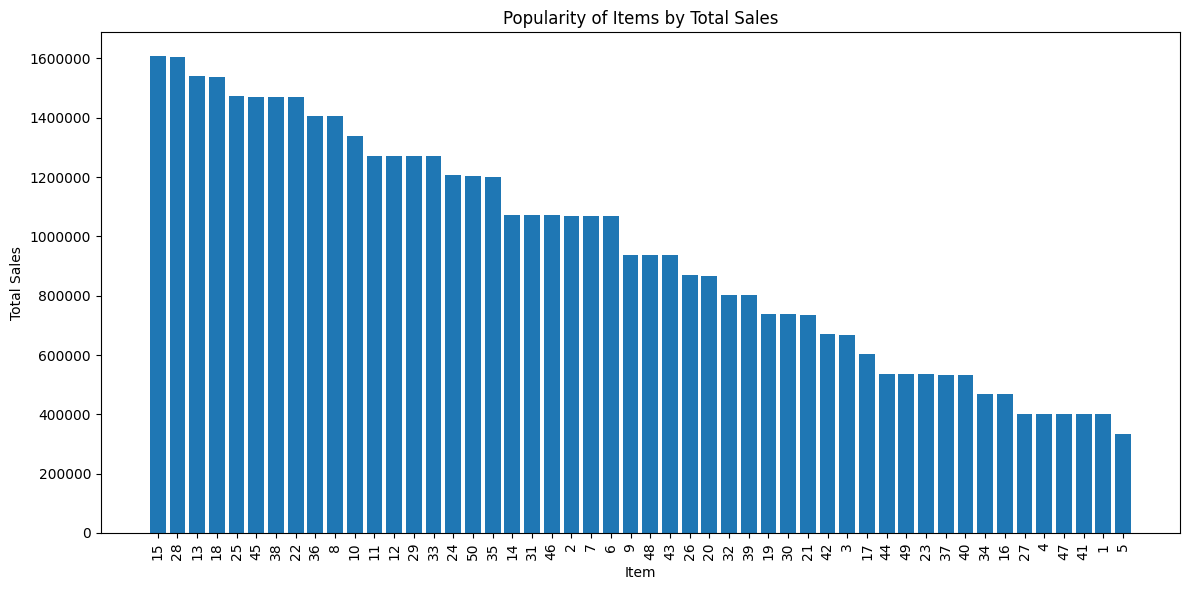

In [29]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(item_sales)), item_sales.values)
plt.title('Popularity of Items by Total Sales')
plt.xlabel('Item')
plt.ylabel('Total Sales')
plt.xticks(range(len(item_sales)), item_sales.index, rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [30]:
# Prepare data
df['date'] = pd.to_datetime(df['date'])
item_sales = df.groupby('item')['sales'].sum().sort_values(ascending=False)
monthly_sales = df.groupby(df['date'].dt.to_period('M'))['sales'].sum()
store_performance = df.groupby('store').agg({
    'sales': 'sum',
    'item': 'nunique'
}).rename(columns={'sales': 'total_sales', 'item': 'unique_items'})


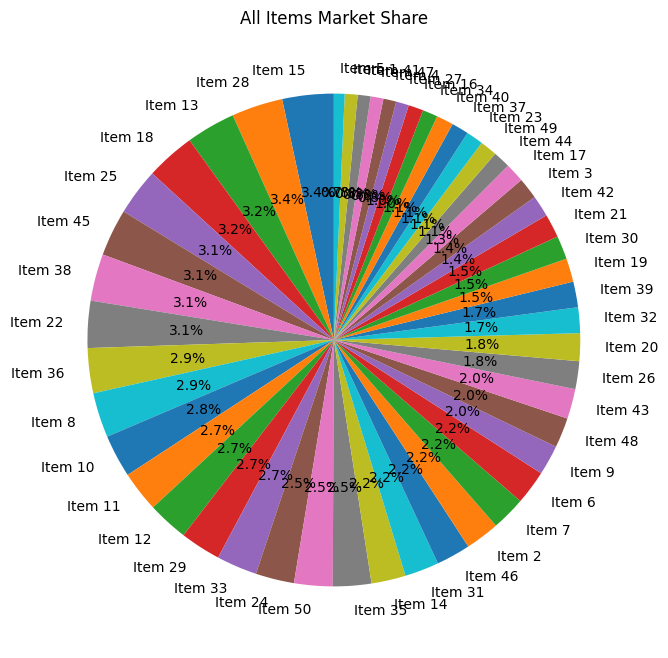

In [31]:
plt.figure(figsize=(10, 8))
plt.pie(item_sales.values, labels=[f'Item {x}' for x in item_sales.index],
        autopct='%1.1f%%', startangle=90)
plt.title('All Items Market Share')
plt.show()

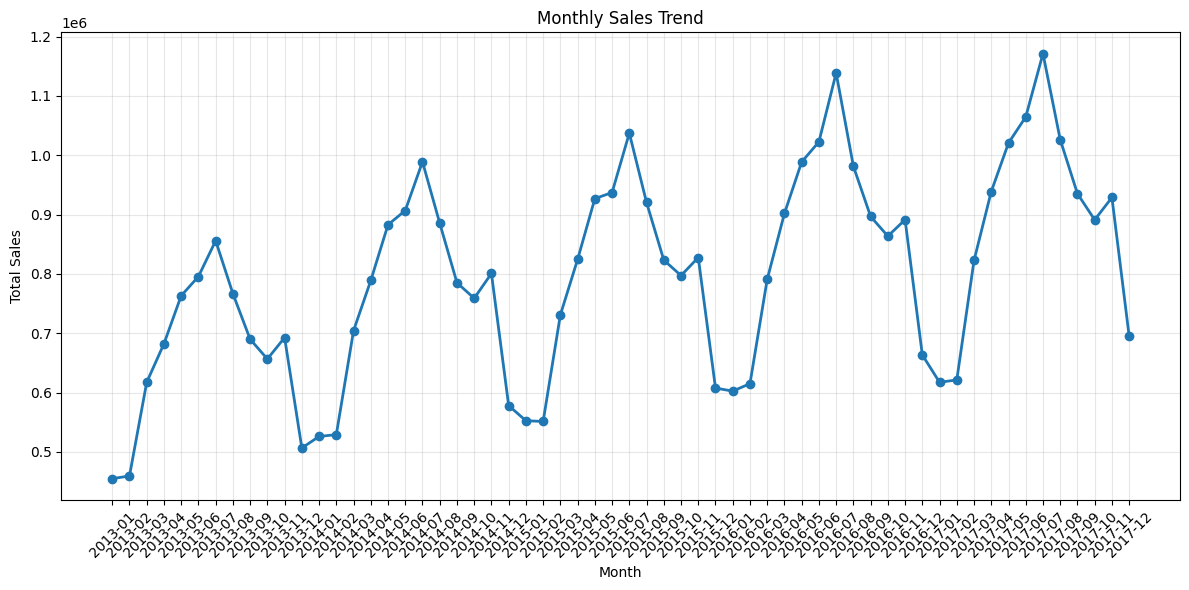

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', linewidth=2)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()